In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from random import sample
from PIL import Image
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader, Dataset

In [2]:
IMAGE_PATH = r"data/IDD20K_II/image_archive"
MASK_PATH = r"data/IDD20K_II/mask_archive"

Objects:dict[int:str] = {
    0: "road",
    2: "sidewalk",
    4: "person",
    5: "rider",
    6: "motorcycle",
    7: "bicycle",
    9: "car",
    10: "truck",
    11: "bus",
    12: "train",
    14: "wall",
    15: "fence",
    18: "traffic sign",
    19: "traffic light",
    20: "pole",
    22: "building",
    24: "vegetation",
    25: "sky",
}

Cityscape_to_IDD:dict[int:int] = {
    0: 0, # road
    1: 2, # sidewalk
    2: 22, # building
    3: 14, # wall
    4: 15, # fence
    5: 20, # pole
    6: 19, # traffic light
    7: 18, # traffic sign
    8: 24, # vegetation
    9: 24, # terrain (DOES NOT EXIST IN IDD)
    10: 25, # sky
    11: 4, # person
    12: 5, # rider
    13: 9, # car
    14: 10, # truck
    15: 11, # bus
    16: 12, # train
    17: 6, # motorcycle
    18: 7,# bicycle
}

Colour_Encoding_Class = {
    0: [128, 64, 128], 
    2: [244, 35, 232], 
    4: [220, 20, 60], 
    5: [255, 0, 0], 
    6: [0, 0, 230], 
    7: [119, 11, 32], 
    9: [0, 0, 142],
    10: [0, 0, 70],
    11: [0, 60, 100], 
    12: [0, 80,100],
    14: [102, 102, 156], 
    15: [190, 153, 153],
    18: [220, 220, 0], 
    19: [250, 170, 30], 
    20: [153, 153, 153], 
    22: [70, 70, 70], 
    24: [107, 142, 35], 
    25: [70, 130, 180], 
}


In [3]:
# Load the names of all images in a directory which have both a mask and a image
def load_images(directory):
    images = set()
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            images.add(int((filename.split("_")[1]).split(".")[0]))
    return images

imgs = load_images(IMAGE_PATH)
masks = load_images(MASK_PATH)

common_images = list(imgs.intersection(masks))
common_images = sample(common_images, int(0.3*len(common_images)))

In [4]:
class IDD_Dataset(Dataset):

    def __init__(self, img_dir, image_list, name_pattern, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.image_list = image_list
        self.name_pattern = name_pattern
        
    def __len__(self):
        return len(self.image_list)
    
    def __getitem__(self, idx):
        img_num = self.image_list[idx]
        img_name = os.path.join(self.img_dir, self.name_pattern(img_num))
        image = Image.open(img_name).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image

In [5]:
def ColorClassinMap(image):
    image = np.array(image)
    new_image = np.zeros((image.shape[0], image.shape[1], 3))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j][0] in Objects:
                new_image[i][j] = Colour_Encoding_Class[image[i][j][0]]
    return new_image

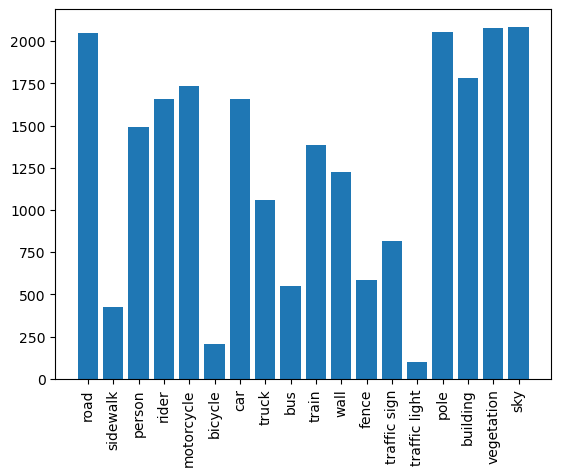

road


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


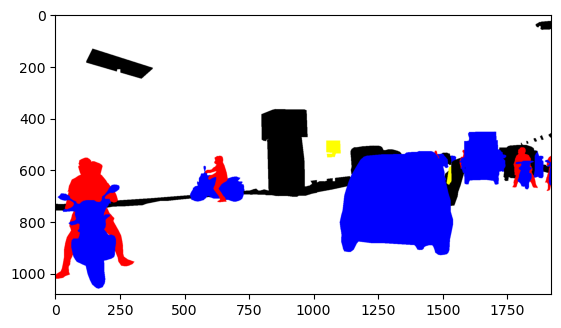

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


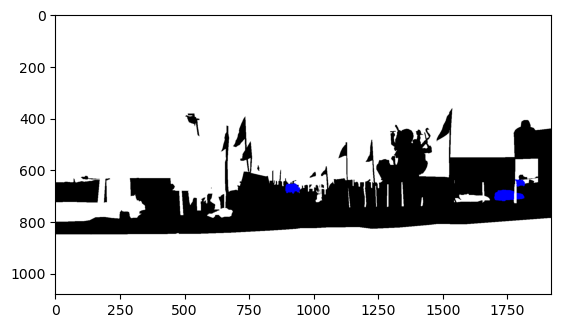

sidewalk


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


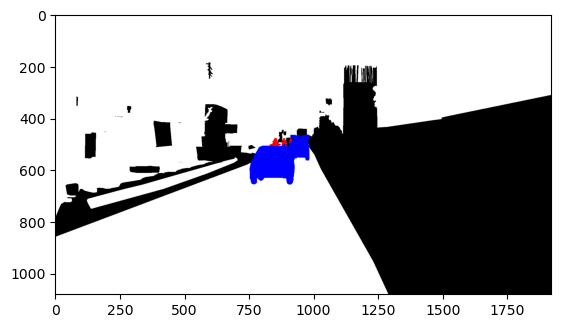

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


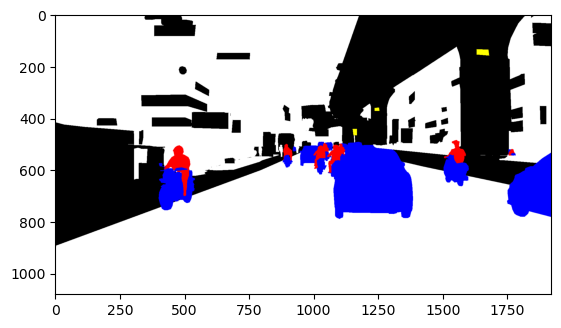

person


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


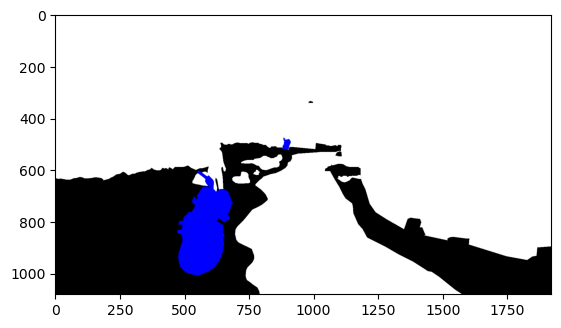

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


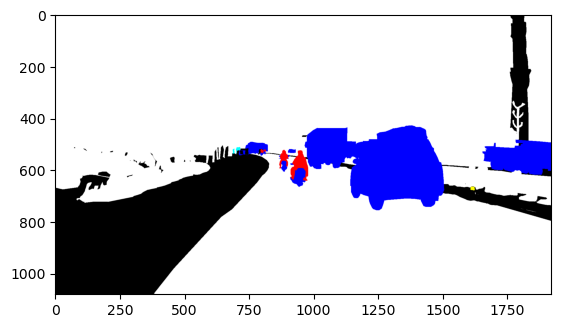

rider


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


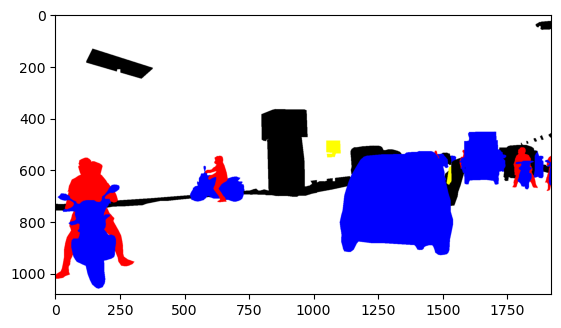

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


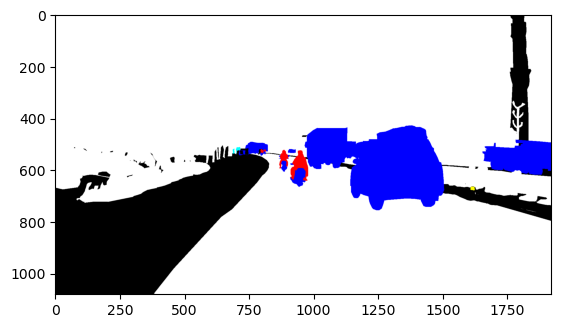

motorcycle


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


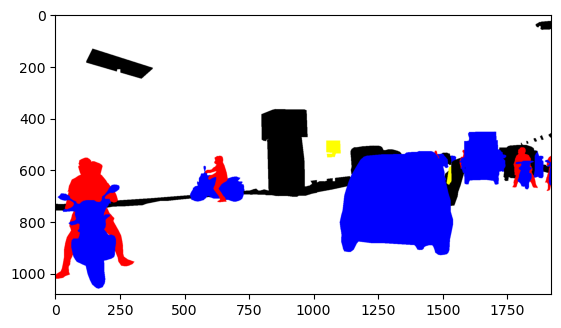

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


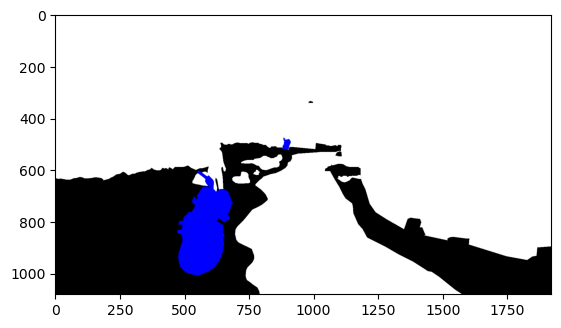

bicycle


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


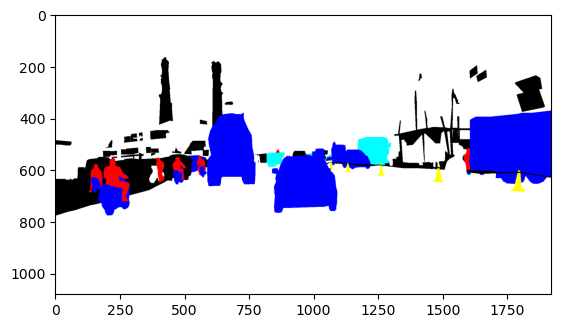

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


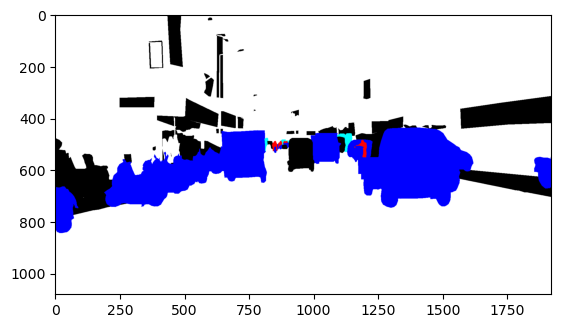

car


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


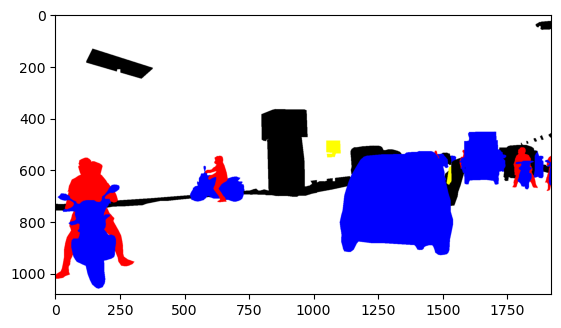

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


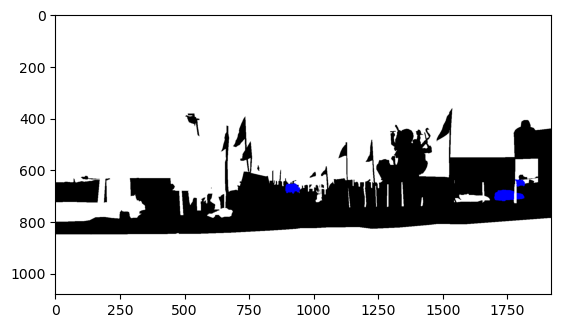

truck


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


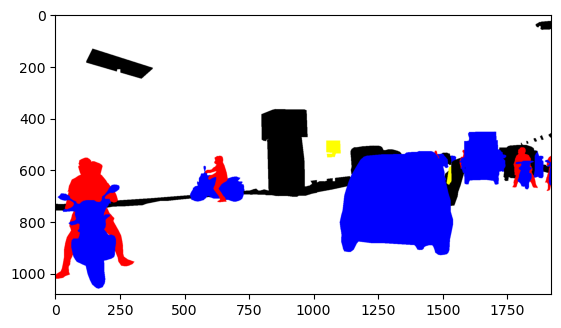

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


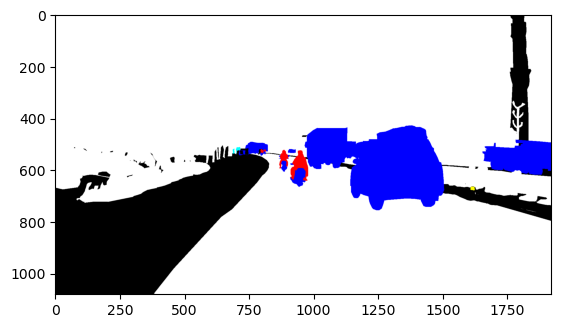

bus


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


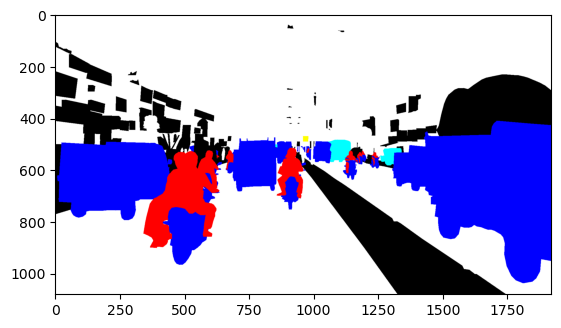

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


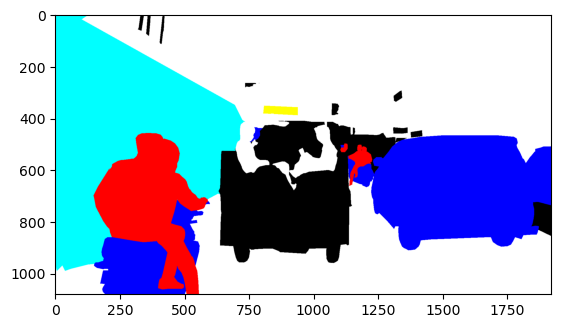

train


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


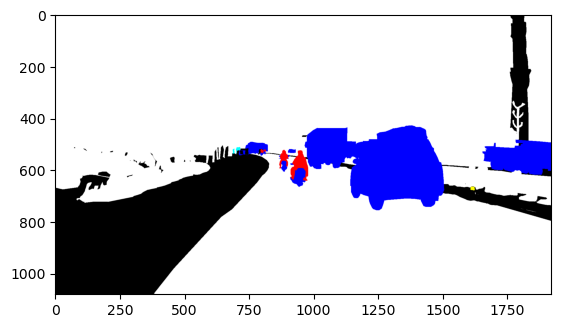

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


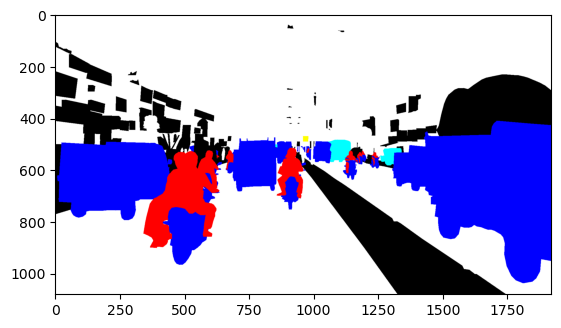

wall


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


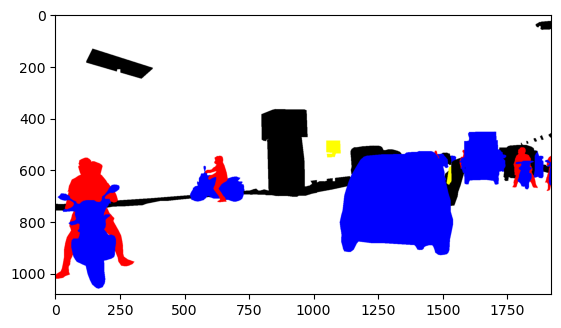

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


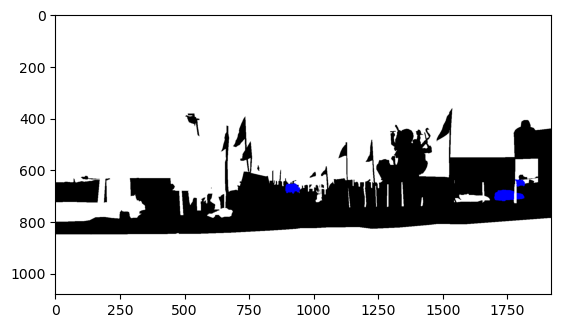

fence


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


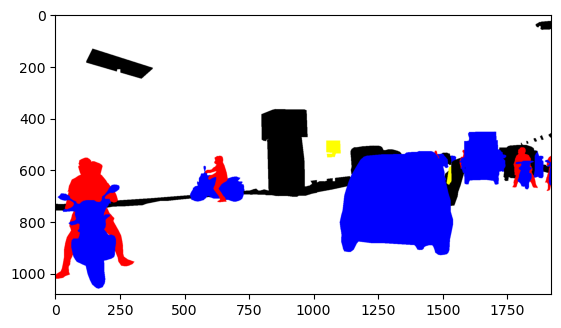

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


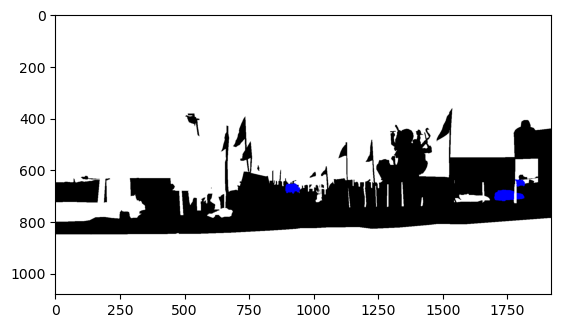

traffic sign


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


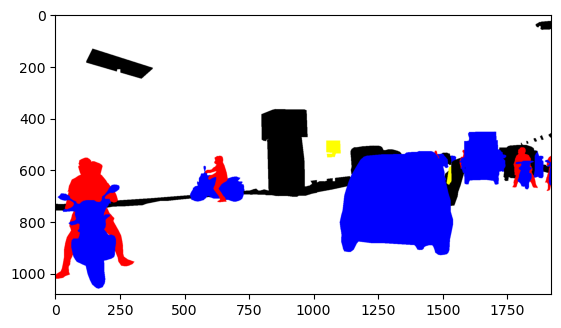

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


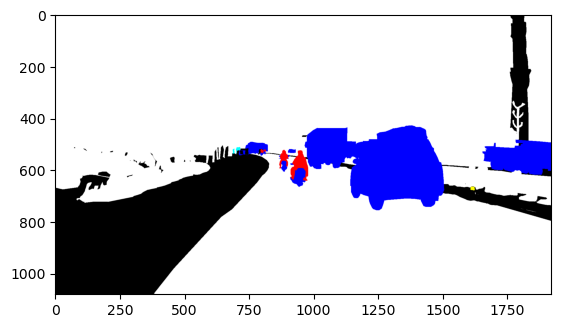

traffic light


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


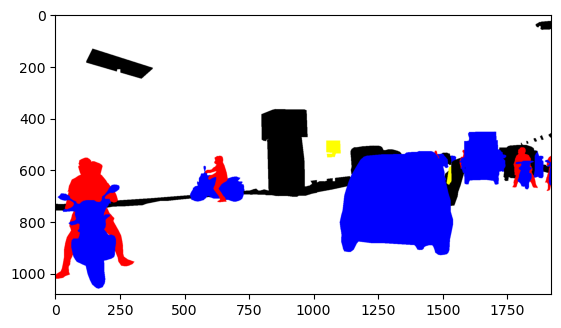

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


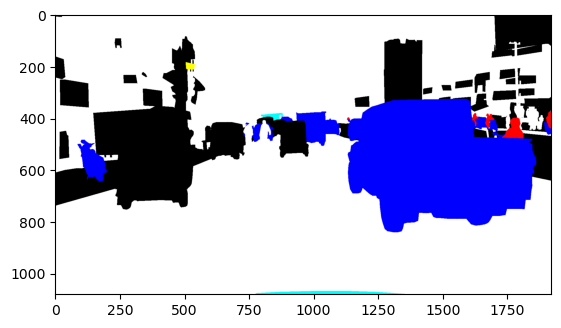

pole


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


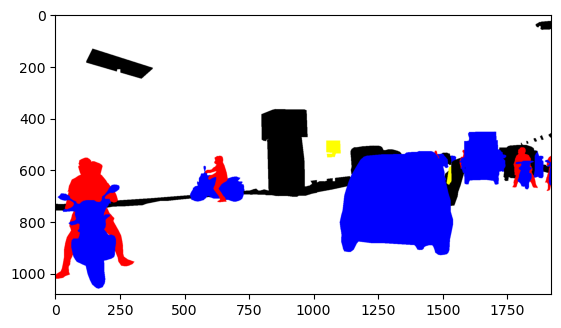

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


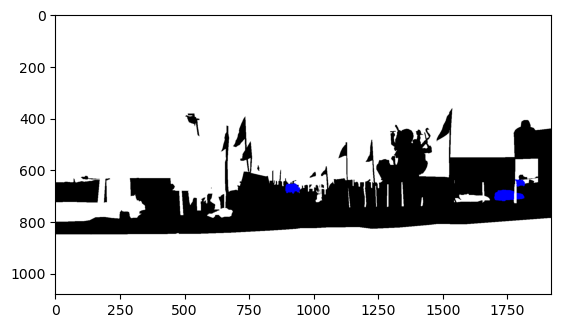

building


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


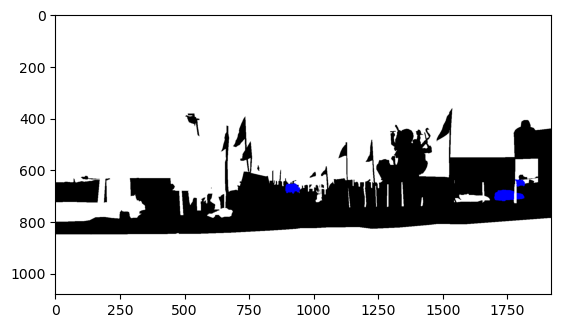

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


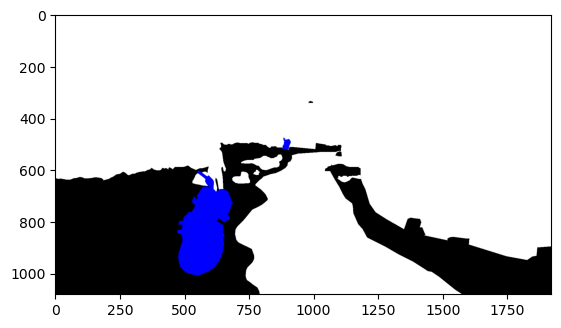

vegetation


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


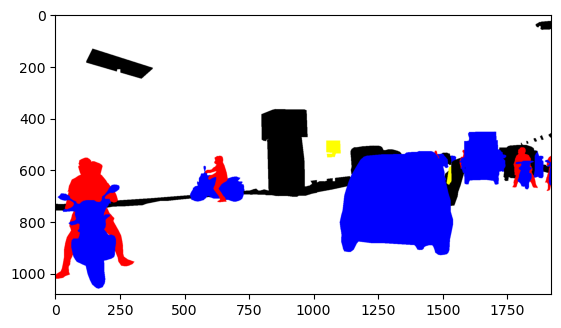

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


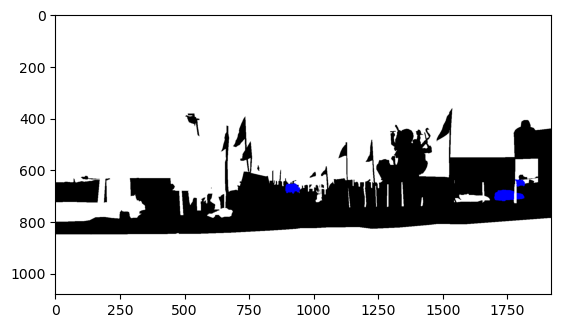

sky


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


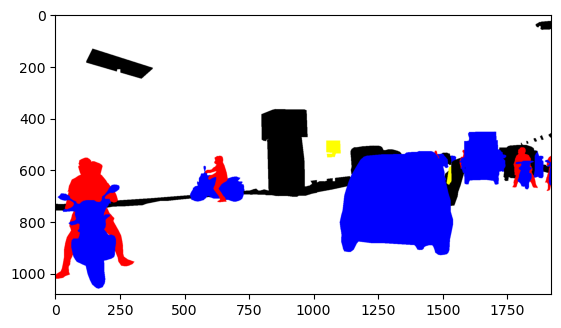

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


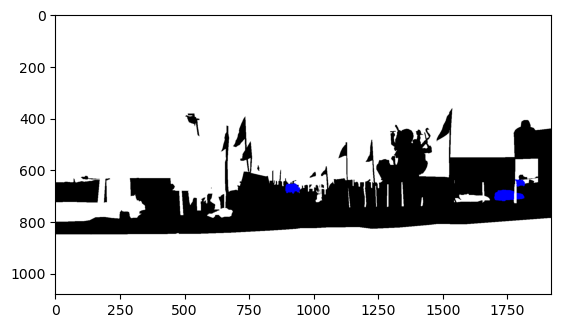

In [6]:
transform = torchvision.transforms.Compose([torchvision.transforms.Resize((512, 512)), torchvision.transforms.ToTensor()])
transform1 = torchvision.transforms.Resize((512, 512))
mask_dataset = IDD_Dataset(MASK_PATH, common_images, lambda x: f"mask_{x}.jpg", transform=None)

# Loading all the masks to a dict to find the number of instances of each class
mask_cnt:dict[str:int] = {}
mask_example:dict[str:list[int]] = {}
for val in Objects.values():
    mask_example[val] = []
    mask_cnt[val] = 0
for i in range(len(mask_dataset)):
    uniq_vals = np.unique(mask_dataset[i])
    for val in uniq_vals:
        if val.item() not in Objects:
            continue
        mask_cnt[Objects[val.item()]] += 1
        if len(mask_example[Objects[val.item()]]) < 2:
            mask_example[Objects[val.item()]].append(i)

# Plotting the number of instances of each class
plt.bar(mask_cnt.keys(), mask_cnt.values())
plt.xticks(rotation=90)
plt.show()

# Plotting the first and second instance of each class and colouring the mask
for key in mask_example:
    print(key)
    plt.imshow(ColorClassinMap(mask_dataset[mask_example[key][0]]))
    plt.show()
    plt.imshow(ColorClassinMap(mask_dataset[mask_example[key][1]]))
    plt.show()


In [9]:
# Initialising dictionary to store accuracy benchmarks
count_occurances:dict[str:int] = {}
pixel_wise_accuracy:dict[str:[int, int]] = {}
dice_coefficient:dict[str:float] = {}
iou:dict[str:float] = {}
true_positive:dict[str:int] = {}
false_positive:dict[str:int] = {}
false_negative:dict[str:int] = {}
example_images:dict[str:list[list[int, np.ndarray, np.ndarray]]] = {}
for val in Objects:
    count_occurances[val] = 0
    pixel_wise_accuracy[val] = [0, 0]
    dice_coefficient[val] = 0
    iou[val] = 0
    true_positive[val] = 0
    false_positive[val] = 0
    false_negative[val] = 0
    example_images[val] = []
confusion_matrix = [[0 for _ in range(max(Objects.keys()) + 2)] for _ in range(max(Objects.keys()) + 2)] # +1 for the background class

def TransformMaskandFilter(mask, transform:None):
    trans_mask = transform(mask)
    mask = np.array(mask)
    trans_mask = np.array(trans_mask)
    mask = mask[:,:,0]
    trans_mask = trans_mask[:,:,0]
    og_classes = np.unique(mask)
    for i in range(512):
        for j in range(512):
            if trans_mask[i][j] not in og_classes:
                trans_mask[i][j] = 255
    return trans_mask

def ProcessResultfromModel(pred, idx):

    mask = TransformMaskandFilter(mask_dataset[idx], transform1)
    for j in range(512):
        for k in range(512):
            if pred[j][k] in Cityscape_to_IDD:
                pred[j][k] = Cityscape_to_IDD[pred[j][k]]
            else:
                pred[j][k] = 255

    # Printing the mask and the prediction
    # plt.imshow(pred)
    # plt.show()
    # plt.imshow(mask)
    # plt.show()

    # Find all the classes in the mask and the prediction
    mask_classes = np.unique(mask)
    pred_classes = np.unique(pred)
    all_classes = np.unique(np.concatenate((mask_classes, pred_classes)))

    # Checking for true positives, false positives and false negatives
    for val in all_classes:
        if val not in Objects:
            continue
        if val in mask_classes and val in pred_classes:
            true_positive[val] += 1
        elif val in mask_classes and val not in pred_classes:
            false_negative[val] += 1
        elif val not in mask_classes and val in pred_classes:
            false_positive[val] += 1

    # Calculating the pixel wise accuracy, dice coefficient and iou
    class_wise_vals = {}
    for val in all_classes:
        if val not in Objects:
            continue
        class_wise_vals[val] = [0, 0, 0] # [Both same class, either same class, mask class]
        count_occurances[val] += 1

    for i in range(512):
        for j in range(512):
            if pred[i][j] == mask[i][j]:
                if pred[i][j] in Objects:
                    class_wise_vals[pred[i][j]][0] += 1
                    class_wise_vals[pred[i][j]][1] += 1
            else:
                if pred[i][j] in Objects:
                    class_wise_vals[pred[i][j]][1] += 1
                if mask[i][j] in Objects:
                    class_wise_vals[mask[i][j]][1] += 1   
            if mask[i][j] in Objects:
                class_wise_vals[mask[i][j]][2] += 1   
            mask_val = mask[i][j] if mask[i][j] in Objects else max(Objects.keys()) + 1
            pred_val = pred[i][j] if pred[i][j] in Objects else max(Objects.keys()) + 1
            confusion_matrix[mask_val][pred_val] += 1

    for val in class_wise_vals:
        pixel_wise_accuracy[val][0] += class_wise_vals[val][0]
        pixel_wise_accuracy[val][1] += class_wise_vals[val][2]
        class_dice_coefficient = (2*class_wise_vals[val][0])/(class_wise_vals[val][0]+class_wise_vals[val][1])
        class_iou = class_wise_vals[val][0]/class_wise_vals[val][1]
        dice_coefficient[val] = (dice_coefficient[val]*(count_occurances[val] - 1) + class_dice_coefficient)/count_occurances[val]
        iou[val] += (iou[val]*(count_occurances[val] - 1) + class_iou)/count_occurances[val]
        # Saving the first 3 examples of the class with iou < 0.5
        if (class_iou < 0.5) and (len(example_images[val]) < 3):
            example_images[val].append([idx, mask, pred])

In [11]:
sys.path.append(r"DeepLabV3Plus-Pytorch")
import network

img_dataset = IDD_Dataset(IMAGE_PATH, common_images, lambda x: f"image_{x}.jpg", transform=transform)
dataloader = DataLoader(img_dataset, batch_size=4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

MODEL_NAME:str = "deeplabv3plus_resnet101"
NUM_CLASSES:int = 19
PATH_TO_PTH:str = r"best_deeplabv3plus_resnet101_cityscapes_os16.pth.tar"

model = network.modeling.__dict__[MODEL_NAME](num_classes=NUM_CLASSES, output_stride=16)
model.load_state_dict(torch.load(PATH_TO_PTH)['model_state'])
model = model.to(device)
model.eval()

# Using the model to predict the masks
for idx, data in enumerate(dataloader):
    # output the image and the mask
    image = data.to(device)
    output = model(image)
    pred = output.max(1)[1].cpu().numpy()
    pred = pred.astype(np.uint8)

    for itr in range(4):
        ProcessResultfromModel(pred[itr], idx*4 + itr)
        print(idx*4 + itr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
# Pickle the results in different files for future use
import pickle
with open("pickle_dumps/count_occurances.pickle", "wb") as file:
    pickle.dump(count_occurances, file)
with open("pickle_dumps/pixel_wise_accuracy.pickle", "wb") as file:
    pickle.dump(pixel_wise_accuracy, file)
with open("pickle_dumps/dice_coefficient.pickle", "wb") as file:
    pickle.dump(dice_coefficient, file)
with open("pickle_dumps/iou.pickle", "wb") as file:
    pickle.dump(iou, file)
with open("pickle_dumps/true_positive.pickle", "wb") as file:
    pickle.dump(true_positive, file)
with open("pickle_dumps/false_positive.pickle", "wb") as file:
    pickle.dump(false_positive, file)
with open("pickle_dumps/false_negative.pickle", "wb") as file:
    pickle.dump(false_negative, file)
with open("pickle_dumps/example_images.pickle", "wb") as file:
    pickle.dump(example_images, file)
with open("pickle_dumps/confusion_matrix.pickle", "wb") as file:
    pickle.dump(confusion_matrix, file)

In [ ]:
# pred = output.max(1)[1].detach().cpu().numpy()
# pred_img = pred.astype(np.uint8)
# pred_img = pred_img[0]
# # Converting pred from Cityscape to IDD
# for i in range(pred_img.shape[0]):
#     for j in range(pred_img.shape[1]):
#         if pred_img[i][j] in Cityscape_to_IDD:
#             pred_img[i][j] = Cityscape_to_IDD[pred_img[i][j]]
#         else:
#             pred[i][j] = 0
# print(pred_img.shape)
# plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
# plt.imshow(pred_img)
# plt.title('Predicted Mask')

# # Get the first mask and plot it to compare
# mask = mask_dataset[0]
# trans_mask = transform1(mask)
# plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
# plt.imshow(trans_mask, cmap = 'viridis')
# plt.title('Original Mask')

# # Show both mask and predicted mask
# plt.show()

In [12]:
print(iou)

{0: inf, 2: inf, 4: inf, 5: inf, 6: inf, 7: inf, 9: inf, 10: inf, 11: 2.750677889547844e+214, 12: inf, 14: inf, 15: inf, 18: inf, 19: 1.7417357279484765e+32, 20: inf, 22: inf, 24: inf, 25: inf}


In [27]:
for k, v in dice_coefficient.items():
    print(f"{k}: {v}")

0: 0.8347246423238708
2: 0.06795533208547032
4: 0.15017385332021826
5: 0.17361322316697747
6: 0.10923176107763012
7: 0.015301347644554457
9: 0.40876114943781866
10: 0.06969424648299498
11: 0.11128387504853847
12: 0.0008969251167751287
14: 0.07064746505057634
15: 0.047307379110175185
18: 0.05778564281351255
19: 0.004320419368015043
20: 0.17673331165139822
22: 0.3624609513349007
24: 0.7288135365587347
25: 0.8620730683528642


In [15]:
for n, d in pixel_wise_accuracy.items():
    print(f"{n} : {d[0] / d[1]}")

0 : 0.9747620887424637
2 : 0.6144586732382882
4 : 0.5228940704710997
5 : 0.23926113382532566
6 : 0.22101729690750277
7 : 0.44801795693536095
9 : 0.8887182172213784
10 : 0.21324097335707376
11 : 0.5234388560181675
12 : 0.0029395574860515378
14 : 0.22394720004163907
15 : 0.34980900315457786
18 : 0.2575165906276871
19 : 0.00774652722154839
20 : 0.20609670183097945
22 : 0.8659733492676863
24 : 0.9045037570326133
25 : 0.8918432360068211


In [21]:
precision = {}


for i in true_positive.keys():
    precision[i] = true_positive[i] / (true_positive[i] + false_positive[i]) 
    print(f"{i} : {precision[i]}")

0 : 0.9775641025641025
2 : 0.21562658548959918
4 : 0.8255813953488372
5 : 0.9643605870020965
6 : 0.9741641337386018
7 : 0.13064295485636115
9 : 0.8764872521246458
10 : 0.8025641025641026
11 : 0.5746478873239437
12 : 0.797979797979798
14 : 0.616652211621856
15 : 0.3027730616864743
18 : 0.44452662721893493
19 : 0.08139534883720931
20 : 0.9912998976458547
22 : 0.8720038350910834
24 : 0.9976314542870678
25 : 0.998109640831758


In [24]:
recall = {}


for i in true_positive.keys():
    recall[i] = true_positive[i] / (true_positive[i] + false_negative[i]) 
    print(f"{i} : {recall[i]}")

0 : 1.0
2 : 0.9659090909090909
4 : 0.8229233741146169
5 : 0.5327156919513607
6 : 0.3553215077605322
7 : 0.8967136150234741
9 : 0.8968115942028986
10 : 0.2802148612354521
11 : 0.3585237258347979
12 : 0.10941828254847645
14 : 0.558523173605656
15 : 0.8756137479541735
18 : 0.7045720984759671
19 : 0.06481481481481481
20 : 0.9026095060577819
22 : 0.9800646551724138
24 : 0.970954356846473
25 : 0.9714811407543699


In [25]:
f1 = {}


for i in true_positive.keys():
    f1[i] = (2 * precision[i] * recall[i]) / (precision[i] + recall[i]) 
    print(f"{i} : {f1[i]}")

0 : 0.9886547811993517
2 : 0.3525508087930319
4 : 0.8242502418574653
5 : 0.6863110779559866
6 : 0.5207148659626321
7 : 0.22805970149253732
9 : 0.8865329512893982
10 : 0.41539482415394824
11 : 0.44155844155844165
12 : 0.19244823386114496
14 : 0.5861500412201155
15 : 0.4499579478553406
18 : 0.545124716553288
19 : 0.07216494845360825
20 : 0.9448780487804879
22 : 0.9228817858954844
24 : 0.9841121495327103
25 : 0.9846153846153846
